In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import SGD
import numpy as np
import cv2
import glob
import matplotlib.pyplot as plt

In [ ]:
imagePaths = 'Dataset\\'
label_list = ['Nangka', 'Pepaya']
data = []
labels = []



In [4]:
for label in label_list:
    for imagePath in glob.glob(imagePaths+label+'\\*.jpg'):
        #print(imagePath)
        image = cv2.imread(imagePath)
        image = cv2.resize(image, (32, 32))
        data.append(image)
        labels.append(label)

In [5]:
np.array(data).shape

(100, 32, 32, 3)

In [6]:
# ubah type data dari list menjadi array
# ubah nilai dari tiap pixel menjadi range [0..1]
data = np.array(data, dtype='float') / 255.0
labels = np.array(labels)

In [7]:
print(labels)

['Nangka' 'Nangka' 'Nangka' 'Nangka' 'Nangka' 'Nangka' 'Nangka' 'Nangka'
 'Nangka' 'Nangka' 'Nangka' 'Nangka' 'Nangka' 'Nangka' 'Nangka' 'Nangka'
 'Nangka' 'Nangka' 'Nangka' 'Nangka' 'Nangka' 'Nangka' 'Nangka' 'Nangka'
 'Nangka' 'Nangka' 'Nangka' 'Nangka' 'Nangka' 'Nangka' 'Nangka' 'Nangka'
 'Nangka' 'Nangka' 'Nangka' 'Nangka' 'Nangka' 'Nangka' 'Nangka' 'Nangka'
 'Nangka' 'Nangka' 'Nangka' 'Nangka' 'Nangka' 'Nangka' 'Nangka' 'Nangka'
 'Nangka' 'Nangka' 'Pepaya' 'Pepaya' 'Pepaya' 'Pepaya' 'Pepaya' 'Pepaya'
 'Pepaya' 'Pepaya' 'Pepaya' 'Pepaya' 'Pepaya' 'Pepaya' 'Pepaya' 'Pepaya'
 'Pepaya' 'Pepaya' 'Pepaya' 'Pepaya' 'Pepaya' 'Pepaya' 'Pepaya' 'Pepaya'
 'Pepaya' 'Pepaya' 'Pepaya' 'Pepaya' 'Pepaya' 'Pepaya' 'Pepaya' 'Pepaya'
 'Pepaya' 'Pepaya' 'Pepaya' 'Pepaya' 'Pepaya' 'Pepaya' 'Pepaya' 'Pepaya'
 'Pepaya' 'Pepaya' 'Pepaya' 'Pepaya' 'Pepaya' 'Pepaya' 'Pepaya' 'Pepaya'
 'Pepaya' 'Pepaya' 'Pepaya' 'Pepaya']


In [30]:
lb = LabelEncoder()
labels = lb.fit_transform(labels)
print(labels)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [31]:
x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

In [32]:
print('Ukuran data train =', x_train.shape)
print('Ukuran data test =', x_test.shape)

Ukuran data train = (80, 32, 32, 3)
Ukuran data test = (20, 32, 32, 3)


In [33]:
model = Sequential()
model.add(Flatten(input_shape=(32,32,3)))
model.add(Dense(1024, activation="relu"))
model.add(Dense(1024, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

In [34]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 3072)              0         
                                                                 
 dense_3 (Dense)             (None, 1024)              3146752   
                                                                 
 dense_4 (Dense)             (None, 1024)              1049600   
                                                                 
 dense_5 (Dense)             (None, 1)                 1025      
                                                                 
Total params: 4,197,377
Trainable params: 4,197,377
Non-trainable params: 0
_________________________________________________________________


In [35]:
# tentukan hyperparameter
lr = 0.01
max_epochs = 200
opt_funct = SGD(learning_rate=lr)

In [36]:
# compile arsitektur yang telah dibuat
model.compile(loss = 'binary_crossentropy', 
              optimizer = opt_funct, 
              metrics = ['accuracy'])

In [37]:
H = model.fit(x_train, y_train, validation_data=(x_test, y_test), 
          epochs=max_epochs, batch_size=32)

Epoch 1/200
3/3 [==============================] - 1s 113ms/step - loss: 0.6901 - accuracy: 0.5500 - val_loss: 1.1022 - val_accuracy: 0.4000
Epoch 2/200
3/3 [==============================] - 0s 45ms/step - loss: 0.6559 - accuracy: 0.6250 - val_loss: 0.5518 - val_accuracy: 0.9000
Epoch 3/200
3/3 [==============================] - 0s 42ms/step - loss: 0.6026 - accuracy: 0.7375 - val_loss: 0.7065 - val_accuracy: 0.6000
Epoch 4/200
3/3 [==============================] - 0s 41ms/step - loss: 0.9262 - accuracy: 0.4750 - val_loss: 0.6520 - val_accuracy: 0.4000
Epoch 5/200
3/3 [==============================] - 0s 44ms/step - loss: 0.5611 - accuracy: 0.6875 - val_loss: 0.5256 - val_accuracy: 0.6000
Epoch 6/200
3/3 [==============================] - 0s 40ms/step - loss: 0.5372 - accuracy: 0.7000 - val_loss: 0.6270 - val_accuracy: 0.6000
Epoch 7/200
3/3 [==============================] - 0s 46ms/step - loss: 0.6533 - accuracy: 0.5500 - val_loss: 0.5829 - val_accuracy: 0.6500
Epoch 8/200
3/3 [==

3/3 [==============================] - 0s 37ms/step - loss: 0.1489 - accuracy: 0.9750 - val_loss: 0.1593 - val_accuracy: 1.0000
Epoch 60/200
3/3 [==============================] - 0s 37ms/step - loss: 0.1979 - accuracy: 0.9125 - val_loss: 0.3516 - val_accuracy: 0.8500
Epoch 61/200
3/3 [==============================] - 0s 43ms/step - loss: 0.4646 - accuracy: 0.7375 - val_loss: 0.1610 - val_accuracy: 1.0000
Epoch 62/200
3/3 [==============================] - 0s 41ms/step - loss: 0.1668 - accuracy: 0.9750 - val_loss: 0.2072 - val_accuracy: 0.9000
Epoch 63/200
3/3 [==============================] - 0s 44ms/step - loss: 0.1435 - accuracy: 0.9750 - val_loss: 0.1868 - val_accuracy: 0.9500
Epoch 64/200
3/3 [==============================] - 0s 37ms/step - loss: 0.1483 - accuracy: 0.9625 - val_loss: 0.1532 - val_accuracy: 1.0000
Epoch 65/200
3/3 [==============================] - 0s 39ms/step - loss: 0.1540 - accuracy: 0.9500 - val_loss: 0.1526 - val_accuracy: 0.9500
Epoch 66/200
3/3 [========

3/3 [==============================] - 0s 37ms/step - loss: 0.0742 - accuracy: 1.0000 - val_loss: 0.1138 - val_accuracy: 0.9500
Epoch 118/200
3/3 [==============================] - 0s 42ms/step - loss: 0.0581 - accuracy: 1.0000 - val_loss: 0.1063 - val_accuracy: 1.0000
Epoch 119/200
3/3 [==============================] - 0s 43ms/step - loss: 0.0553 - accuracy: 1.0000 - val_loss: 0.1315 - val_accuracy: 0.9500
Epoch 120/200
3/3 [==============================] - 0s 38ms/step - loss: 0.0543 - accuracy: 1.0000 - val_loss: 0.1066 - val_accuracy: 1.0000
Epoch 121/200
3/3 [==============================] - 0s 36ms/step - loss: 0.0536 - accuracy: 1.0000 - val_loss: 0.1391 - val_accuracy: 0.9000
Epoch 122/200
3/3 [==============================] - 0s 37ms/step - loss: 0.1040 - accuracy: 1.0000 - val_loss: 0.1731 - val_accuracy: 0.9500
Epoch 123/200
3/3 [==============================] - 0s 36ms/step - loss: 0.0758 - accuracy: 0.9875 - val_loss: 0.1046 - val_accuracy: 1.0000
Epoch 124/200
3/3 [=

Epoch 175/200
3/3 [==============================] - 0s 39ms/step - loss: 0.0274 - accuracy: 1.0000 - val_loss: 0.0871 - val_accuracy: 1.0000
Epoch 176/200
3/3 [==============================] - 0s 40ms/step - loss: 0.0273 - accuracy: 1.0000 - val_loss: 0.0891 - val_accuracy: 1.0000
Epoch 177/200
3/3 [==============================] - 0s 38ms/step - loss: 0.0304 - accuracy: 1.0000 - val_loss: 0.0891 - val_accuracy: 1.0000
Epoch 178/200
3/3 [==============================] - 0s 35ms/step - loss: 0.0280 - accuracy: 1.0000 - val_loss: 0.0858 - val_accuracy: 1.0000
Epoch 179/200
3/3 [==============================] - 0s 34ms/step - loss: 0.0262 - accuracy: 1.0000 - val_loss: 0.0937 - val_accuracy: 0.9500
Epoch 180/200
3/3 [==============================] - 0s 42ms/step - loss: 0.0256 - accuracy: 1.0000 - val_loss: 0.0939 - val_accuracy: 0.9500
Epoch 181/200
3/3 [==============================] - 0s 39ms/step - loss: 0.0276 - accuracy: 1.0000 - val_loss: 0.0917 - val_accuracy: 1.0000
Epoch 

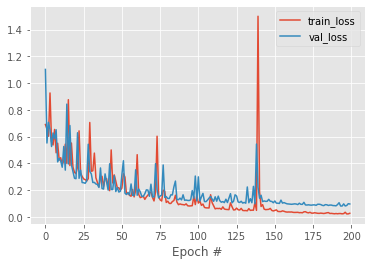

In [38]:
N = np.arange(0, max_epochs)
plt.style.use("ggplot")
plt.figure()
plt.plot(N, H.history["loss"], label="train_loss")
plt.plot(N, H.history["val_loss"], label="val_loss")
#plt.plot(N, H.history["accuracy"], label="train_acc")
#plt.plot(N, H.history["val_accuracy"], label="val_acc")
plt.xlabel("Epoch #")
plt.legend()
plt.show()

In [39]:
# menghitung nilai akurasi model terhadap data test
predictions = model.predict(x_test, batch_size=32)
target = (predictions > 0.5).astype(np.int)
print(classification_report(y_test, target, target_names=label_list))

              precision    recall  f1-score   support

      Nangka       0.92      1.00      0.96        12
      Pepaya       1.00      0.88      0.93         8

    accuracy                           0.95        20
   macro avg       0.96      0.94      0.95        20
weighted avg       0.95      0.95      0.95        20



In [44]:
# uji model menggunakan image lain
queryPath = imagePaths+'query_pepaya.jpg'
query = cv2.imread(queryPath)
output = query.copy()
query = cv2.resize(query, (32, 32))
q = []
q.append(query)
q = np.array(q, dtype='float') / 255.0

q_pred = model.predict(q)
print(q_pred)

[[0.9661652]]


In [45]:
if q_pred<=0.5 :
    target = "Nangka"
else :
    target = "Pepaya"
text = "{}".format(target)
cv2.putText(output, text, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 2)
 
# menampilkan output image
cv2.imshow('Output', output)
cv2.waitKey() # image tidak akan diclose,sebelum user menekan sembarang tombol
cv2.destroyWindow('Output') # image akan diclose

error: OpenCV(4.5.4-dev) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window_w32.cpp:1261: error: (-27:Null pointer) NULL window: 'Output' in function 'cvDestroyWindow'
